In [493]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [494]:
# Loading dataset
df = pd.read_csv('/content/drive/MyDrive/Encryptix/Movies/IMDb Movies India.csv', encoding= 'latin1')

In [495]:
# Exploring the dataset
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())

First 5 rows of the dataset:
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana

In [496]:
# Dropping the rows where 'Rating' is missing as it's our target variable
df = df.dropna(subset=['Rating'])
print("\nDataset after dropping rows with missing 'Rating':")
print(df.info())


Dataset after dropping rows with missing 'Rating':
<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7919 non-null   object 
 1   Year      7919 non-null   object 
 2   Duration  5851 non-null   object 
 3   Genre     7817 non-null   object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   object 
 6   Director  7914 non-null   object 
 7   Actor 1   7794 non-null   object 
 8   Actor 2   7719 non-null   object 
 9   Actor 3   7627 non-null   object 
dtypes: float64(1), object(9)
memory usage: 680.5+ KB
None


In [497]:
# Filling the missing values in other columns with a placeholder
df = df.fillna('Unknown')

In [498]:
# Converting 'Year' to numeric
df['Year'] = df['Year'].str.extract('(\d{4})').astype(float)

In [499]:
df['Year']

1        2019.0
3        2019.0
5        1997.0
6        2005.0
8        2012.0
          ...  
15501    1992.0
15503    1989.0
15504    1988.0
15505    1999.0
15508    1998.0
Name: Year, Length: 7919, dtype: float64

In [500]:
# Replacing the 'Unknown' in 'Duration' with NaN and then converting it to numeric
df['Duration'] = df['Duration'].astype(str).replace('Unknown', np.nan)
df['Duration'] = df['Duration'].str.replace(' min', '').astype(float)

In [501]:
df['Duration']

1        109.0
3        110.0
5        147.0
6        142.0
8         82.0
         ...  
15501      NaN
15503    125.0
15504      NaN
15505    129.0
15508    130.0
Name: Duration, Length: 7919, dtype: float64

In [502]:
# Replacing the 'Unknown' in 'Votes' with NaN and then converting it to numeric
df['Votes'] = df['Votes'].astype(str).replace('Unknown', np.nan)
df['Votes'] = df['Votes'].str.replace(',', '').astype(float)

In [503]:
df['Votes']

1           8.0
3          35.0
5         827.0
6        1086.0
8         326.0
          ...  
15501     135.0
15503      44.0
15504      11.0
15505     655.0
15508      20.0
Name: Votes, Length: 7919, dtype: float64

In [504]:
# Checking for the duplicate values by Name and Year
duplicate_rows = df[df.duplicated(['Name', 'Year'])]
print(f"\nNumber of duplicate rows by Name and Year: {len(duplicate_rows)}")
if len(duplicate_rows) > 0:
    print(duplicate_rows)


Number of duplicate rows by Name and Year: 3
                   Name    Year  Duration                   Genre  Rating  \
6063   India's Daughter  2015.0     120.0    Action, Crime, Drama     6.9   
12421  Sant Dnyaneshwar  1940.0     137.0               Biography     8.1   
14881            Vikram  1986.0       NaN  Action, Drama, Romance     7.1   

       Votes                 Director              Actor 1       Actor 2  \
6063    21.0              Rupesh Paul  Omkar Das Manikpuri  Amann Grewal   
12421    9.0  Vishnupant Govind Damle      Sheikh Fattelal   Shahu Modak   
14881   38.0        V. Madhusudan Rao   Nagarjuna Akkineni       Shobana   

                   Actor 3  
6063     Vishal Om Prakash  
12421  Datta Dharmadhikari  
14881           Annapoorna  


In [505]:
# Dropping the duplicated values by Name
df = df.drop_duplicates(subset=['Name'])
print(f"\nDataset after dropping duplicates by Name: {df.shape}")


Dataset after dropping duplicates by Name: (7372, 10)


In [506]:
# Final dataframe info after all preprocessing steps
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7372 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7372 non-null   object 
 1   Year      7372 non-null   float64
 2   Duration  5467 non-null   float64
 3   Genre     7372 non-null   object 
 4   Rating    7372 non-null   float64
 5   Votes     7372 non-null   float64
 6   Director  7372 non-null   object 
 7   Actor 1   7372 non-null   object 
 8   Actor 2   7372 non-null   object 
 9   Actor 3   7372 non-null   object 
dtypes: float64(4), object(6)
memory usage: 633.5+ KB
None


In [507]:
df.describe()

,Year,Duration,Rating,Votes
count,7372.000000,5467.000000,7372.000000,7372.000000
mean,1993.831660,131.701299,5.855345,1971.095496
std,20.384302,26.769535,1.384032,11930.781406
min,1917.000000,21.000000,1.100000,5.000000
25%,1980.000000,116.000000,4.900000,16.000000
50%,1998.000000,134.000000,6.000000,55.000000
75%,2012.000000,150.000000,6.900000,419.000000
max,2021.000000,321.000000,10.000000,591417.000000


In [508]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005.0,142.0,"Drama, Romance, War",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012.0,82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


**Analyze the data based on the following points:**



1. Year with best rating.
2. Does length of movie have any impact with the rating?
3. Top 10 movies according to rating per year and overall.
4. Number of popular movies released each year.
5. Counting the number of votes which movies preformed better in rating per year and overall.
6. Which director directed the most/least movies?
7. Which actor starred in the most/least movies?

In [509]:
# Year with best rating and years having the same rating

best_year = df.groupby('Year')['Rating'].mean().sort_values(ascending=False).index[0]
best_rating = df.groupby('Year')['Rating'].mean().sort_values(ascending=False).values[0]

print(f"Year with the best average rating: {best_year}")
print(f"Average rating: {best_rating}")

# Years with the same rating as the best year
same_rating_years = df.groupby('Year')['Rating'].mean().loc[lambda x: x == best_rating].index.tolist()

if len(same_rating_years) > 1:
    print(f"Other years with the same average rating: {same_rating_years}")
else:
    print("No other years have the same average rating.")


Year with the best average rating: 1948.0
Average rating: 7.0687500000000005
No other years have the same average rating.


In [510]:
# Does length of movie have any impact with the rating?

# Calculate the correlation coefficient between rating and duration
correlation = df['Rating'].corr(df['Duration'])

# Print the correlation coefficient
print(f"Correlation between rating and duration: {correlation}")

# Based on the sign of the correlation coefficient, you can determine whether there is a positive or negative relationship between rating and duration.
if correlation > 0:
  print("Yes, there is a positive relationship between rating and duration.")
else:
  print("No, there is no positive relationship between rating and duration.")


Correlation between rating and duration: -0.0302862063672242
No, there is no positive relationship between rating and duration.


In [511]:
 # Top 10 movies according to rating per year
top_movies_by_year = df.groupby('Year')['Rating'].nlargest(10).reset_index()
print("\nTop 10 movies according to rating per year:")
print(top_movies_by_year)

# Top 10 movies according to rating overall
top_movies_overall = df.sort_values(by='Rating', ascending=False).head(10)
print("\nTop 10 movies according to rating overall:")
print(top_movies_overall)



Top 10 movies according to rating per year:
       Year  level_1  Rating
0    1917.0     8146     6.7
1    1931.0     7203     6.2
2    1931.0    14161     6.2
3    1931.0     4171     5.3
4    1932.0     2183     6.1
..      ...      ...     ...
866  2021.0    12673     9.3
867  2021.0     2931     9.1
868  2021.0     6952     9.1
869  2021.0     2535     9.0
870  2021.0     3224     9.0

[871 rows x 3 columns]

Top 10 movies according to rating overall:
                      Name    Year  Duration                         Genre  \
8339       Love Qubool Hai  2020.0      94.0                Drama, Romance   
5410            Half Songs  2021.0      79.0                Music, Romance   
2563                 Breed  2020.0       NaN                         Drama   
6852                  June  2021.0      93.0                         Drama   
5077          Gho Gho Rani  2019.0     105.0              History, Romance   
11704             Ram-Path  2017.0       NaN                   Document

In [512]:
# Number of popular movies released each year.

popular_movies_by_year = df[df['Votes'] > df['Votes'].mean()]
popular_movies_count_by_year = popular_movies_by_year.groupby('Year')['Name'].count().reset_index()
popular_movies_count_by_year.columns = ['Year', 'Number of Popular Movies']

print("\nNumber of popular movies released each year:")
print(popular_movies_count_by_year)



Number of popular movies released each year:
      Year  Number of Popular Movies
0   1951.0                         1
1   1955.0                         1
2   1957.0                         2
3   1959.0                         1
4   1965.0                         1
5   1968.0                         1
6   1970.0                         1
7   1971.0                         1
8   1972.0                         1
9   1973.0                         1
10  1975.0                         3
11  1976.0                         2
12  1977.0                         2
13  1978.0                         2
14  1979.0                         2
15  1980.0                         2
16  1981.0                         3
17  1982.0                         4
18  1983.0                         4
19  1984.0                         1
20  1987.0                         1
21  1988.0                         3
22  1989.0                         4
23  1990.0                         3
24  1991.0                   

In [513]:
# Counting the number of votes which movies performed better in rating per year
high_rated_movies_by_year = df[df['Rating'] >= 8.0]
high_rated_movies_count_by_year = high_rated_movies_by_year.groupby('Year')['Votes'].sum().reset_index()
high_rated_movies_count_by_year.columns = ['Year', 'Total Votes for High Rated Movies']

print("\nTotal votes for high rated movies (Rating >= 8.0) per year:")
print(high_rated_movies_count_by_year)

# Counting the number of votes which movies performed better in rating overall
high_rated_movies_overall = df[df['Rating'] >= 8.0]
total_votes_high_rated_overall = high_rated_movies_overall['Votes'].sum()

print(f"\nTotal votes for high rated movies (Rating >= 8.0) overall: {total_votes_high_rated_overall}")



Total votes for high rated movies (Rating >= 8.0) per year:
      Year  Total Votes for High Rated Movies
0   1934.0                                6.0
1   1943.0                               17.0
2   1946.0                               14.0
3   1947.0                                9.0
4   1948.0                               39.0
..     ...                                ...
66  2017.0                            16683.0
67  2018.0                           201462.0
68  2019.0                           151865.0
69  2020.0                            89425.0
70  2021.0                             8304.0

[71 rows x 2 columns]

Total votes for high rated movies (Rating >= 8.0) overall: 4220735.0


In [514]:
# Finding the row with the highest number of votes
max_votes_row = df[df['Votes'] == df['Votes'].max()]

# Get the name of the movie with the highest votes
movie_highest_votes = max_votes_row['Name'].values[0]

# Find the number of votes for the movie with the highest votes
votes_highest_votes = max_votes_row['Votes'].values[0]

print("Movie with the highest votes:", movie_highest_votes)
print("Number of votes for the movie with the highest votes:", votes_highest_votes)

Movie with the highest votes: Life of Pi
Number of votes for the movie with the highest votes: 591417.0


In [515]:
# Finding the row with the lowest number of votes
min_votes_row = df[df['Votes'] == df['Votes'].min()]

# Name of the movie with the lowest votes
movie_lowest_votes = min_votes_row['Name'].values[0]

# Number of votes for the movie with the lowest votes
votes_lowest_votes = min_votes_row['Votes'].values[0]

print("Movie with the lowest votes:", movie_lowest_votes)
print("Number of votes for the movie with the lowest votes:", votes_lowest_votes)

Movie with the lowest votes: 25th July
Number of votes for the movie with the lowest votes: 5.0


In [516]:
# Finding the row with the highest rating
max_rating_row = df[df['Rating'] == df['Rating'].max()]
movie_highest_rating = max_rating_row['Name'].values[0]
votes_highest_rating = max_rating_row['Votes'].values[0]

print("Movie with the highest rating:", movie_highest_rating)
print("Number of votes for the movie with the highest rating:", votes_highest_rating)

Movie with the highest rating: Love Qubool Hai
Number of votes for the movie with the highest rating: 5.0


In [517]:
# Finding the row with the lowest rating
min_rating_row = df[df['Rating'] == df['Rating'].min()]
movie_lowest_rating = min_rating_row['Name'].values[0]
votes_lowest_rating = min_rating_row['Votes'].values[0]

print("Movie with the lowest rating:", movie_lowest_rating)
print("Number of votes for the movie with the lowest rating:", votes_lowest_rating)

Movie with the lowest rating: Sadak 2
Number of votes for the movie with the lowest rating: 67785.0


In [518]:
# Grouping the dataset by the 'Director' column and counting the number of movies each director has directed
director_counts = df['Director'].value_counts()

# Finding the director with the highest number of movies directed
most_prolific_director = director_counts.idxmax()
num_movies_directed = director_counts.max()

print("Director with the most movies directed:", most_prolific_director)
print("Number of movies directed by", most_prolific_director, ":", num_movies_directed)

Director with the most movies directed: Hrishikesh Mukherjee
Number of movies directed by Hrishikesh Mukherjee : 41


In [519]:
# Grouping the dataset by the 'Director' column and counting the number of movies each director has directed
director_counts = df['Director'].value_counts()

# Finding the director with the lowest number of movies directed
least_prolific_director = director_counts.idxmin()
num_movies_directed = director_counts.min()

print("Director with the least movies directed:", least_prolific_director)
print("Number of movies directed by", most_prolific_director, ":", num_movies_directed)

Director with the least movies directed: Sumitra Bhave
Number of movies directed by Hrishikesh Mukherjee : 1


In [520]:
#Creating some new features
genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating

actor1_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_encoded'] = actor3_mean_rating

In [521]:
# The first few rows after feature engineering
df[['Genre', 'Director', 'Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded','Rating']].head()

,Genre,Director,Actor1_encoded,Actor2_encoded,Actor3_encoded,Rating
1,Drama,Gaurav Bakshi,6.850000,7.000000,7.00,7.0
3,"Comedy, Romance",Ovais Khan,5.420000,4.400000,4.45,4.4
5,"Comedy, Drama, Musical",Rahul Rawail,4.885714,5.814286,5.95,4.7
6,"Drama, Romance, War",Shoojit Sircar,5.278261,6.050000,6.50,7.4
8,"Horror, Mystery, Thriller",Allyson Patel,5.600000,5.883333,5.60,5.6


**Exploratory Data Analysis (EDA)**

In [522]:
sns.set_style('darkgrid')

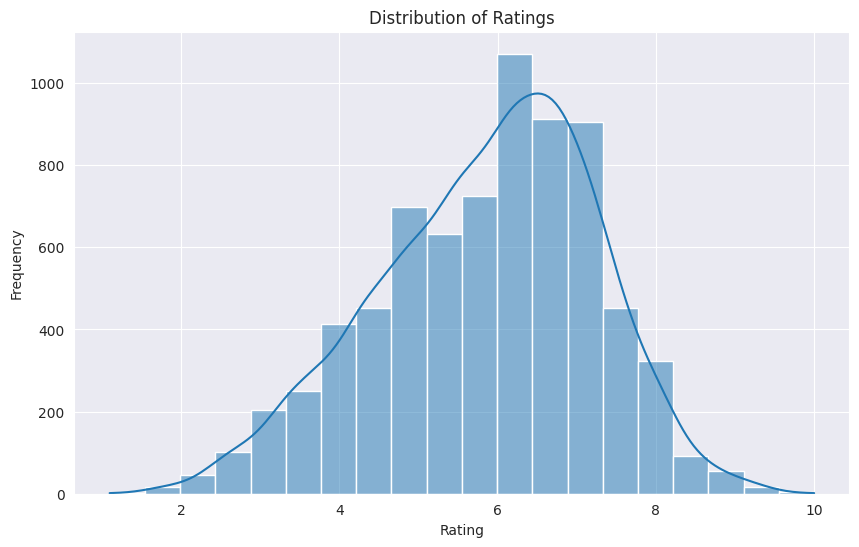

In [523]:
# Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

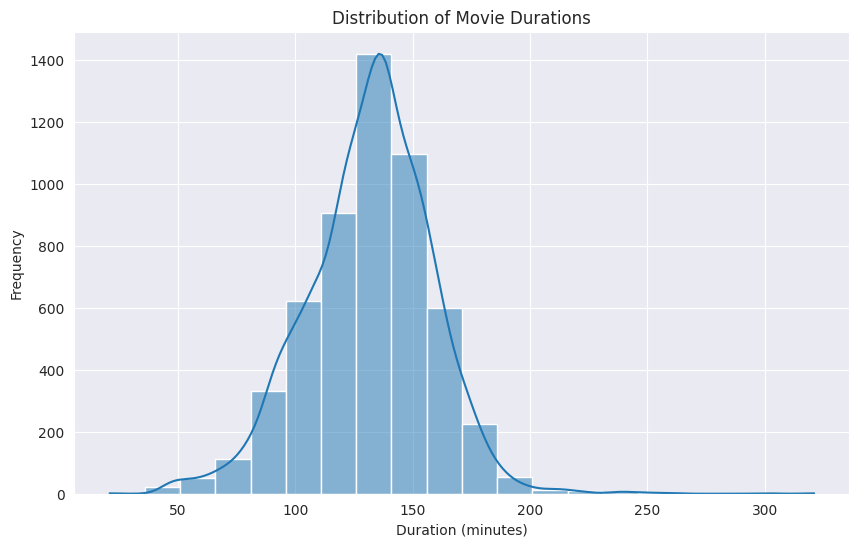

In [524]:
# Distribution of Movie Durations
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration'].dropna(), bins=20, kde=True)
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

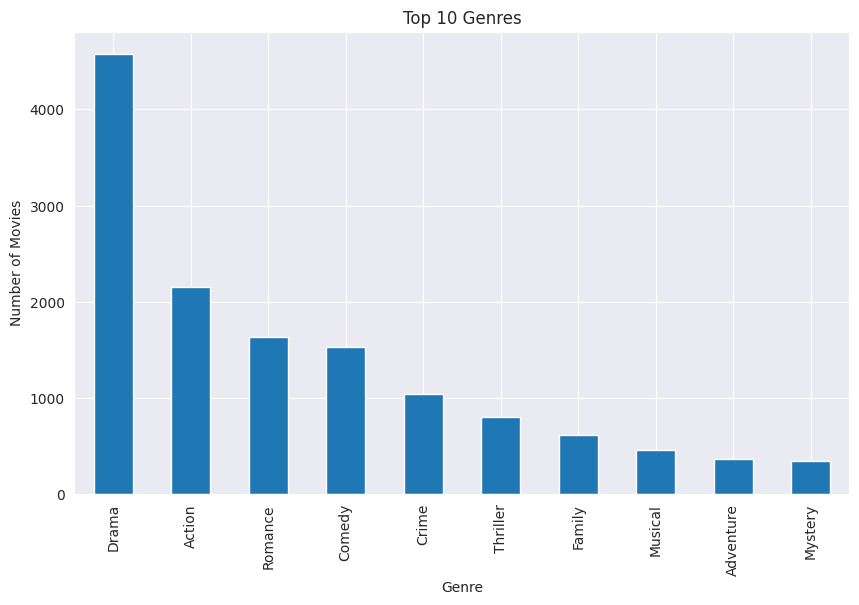

In [525]:
# Top Genres
plt.figure(figsize=(10, 6))
genres = df['Genre'].str.split(', ', expand=True).stack().value_counts()
genres[:10].plot(kind='bar')
plt.title('Top 10 Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

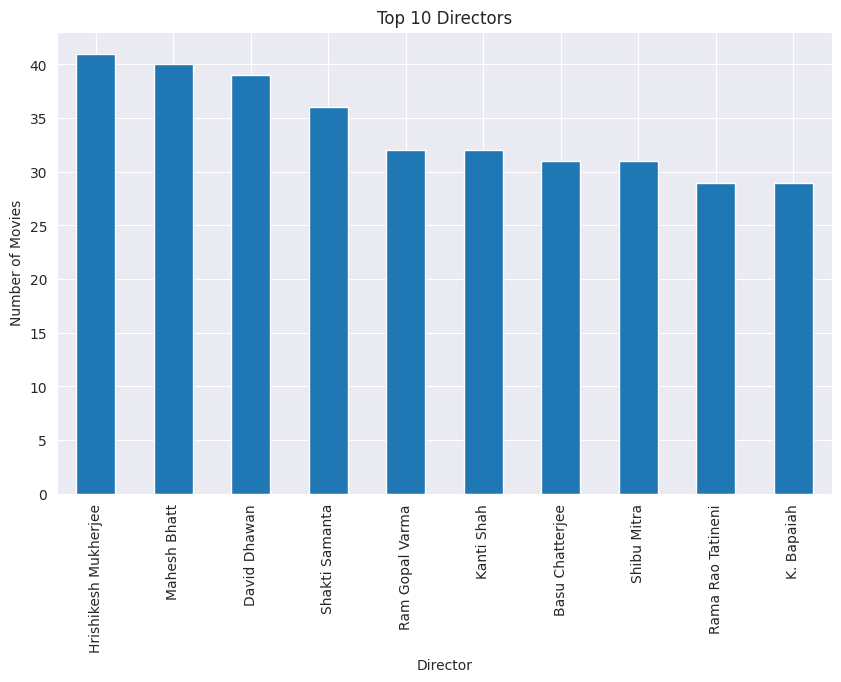

In [526]:
# Top Directors
plt.figure(figsize=(10, 6))
directors = df['Director'].value_counts()
directors[:10].plot(kind='bar')
plt.title('Top 10 Directors')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.show()

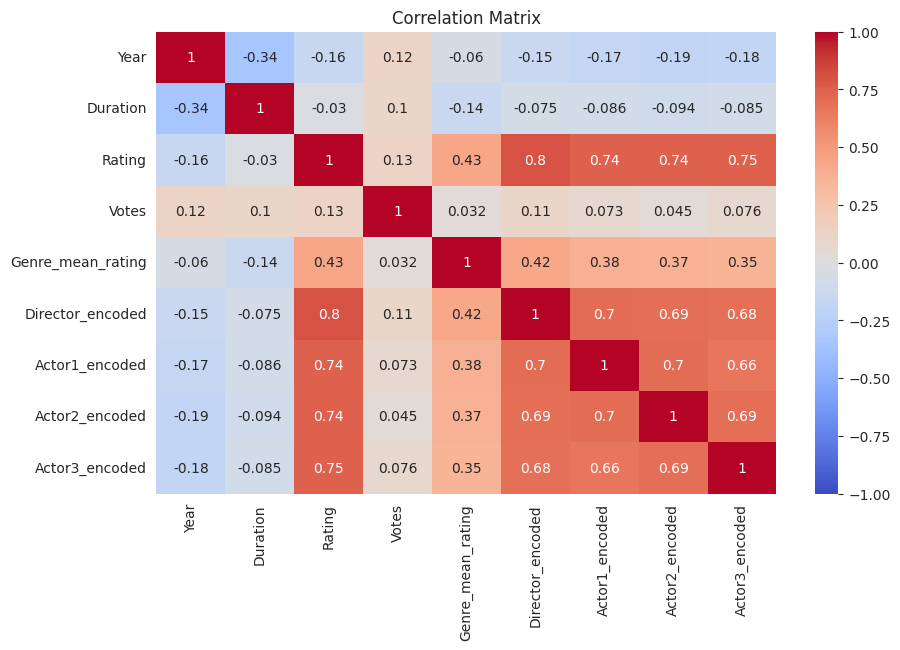

In [527]:
# Correlation Matrix
plt.figure(figsize=(10, 6))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['float', 'int'])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [528]:
# Defining features and target variable
X = df[[ 'Year', 'Votes', 'Duration', 'Genre_mean_rating','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']] # Remove 'Genre' column
y = df['Rating']

In [529]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [530]:
# Imputing missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [531]:
# Building and training Linear Regression model
l_r = LinearRegression()
l_r.fit(X_train_imputed, y_train)
l_r_pred = l_r.predict(X_test_imputed)

In [532]:
# Building and training RandomForestRegressor model
r_f = RandomForestRegressor()
r_f.fit(X_train_imputed, y_train)
r_f_pred = r_f.predict(X_test_imputed)

In [533]:
# Evaluating Linear Regression model
print('The performance evaluation of Linear Regression is below:')
print('Mean squared error:', mean_squared_error(y_test, l_r_pred))
print('Mean absolute error:', mean_absolute_error(y_test, l_r_pred))
print('R2 score:', r2_score(y_test, l_r_pred))

The performance evaluation of Linear Regression is below:
Mean squared error: 0.46342283126395106
Mean absolute error: 0.5049146071874404
R2 score: 0.7668629725419769


In [534]:
# Evaluating RandomForestRegressor model
print('The performance evaluation of Random Forest Regressor is below:')
print('Mean squared error:', mean_squared_error(y_test, r_f_pred))
print('Mean absolute error:', mean_absolute_error(y_test, r_f_pred))
print('R2 score:', r2_score(y_test, r_f_pred))

The performance evaluation of Random Forest Regressor is below:
Mean squared error: 0.38479936135593207
Mean absolute error: 0.41900338983050855
R2 score: 0.8064165741908147


**Testing Our Model**

In [535]:
X.head()

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019.0,8.0,109.0,6.365583,7.000000,6.850000,7.000000,7.00
3,2019.0,35.0,110.0,5.718261,4.400000,5.420000,4.400000,4.45
5,1997.0,827.0,147.0,6.171739,5.266667,4.885714,5.814286,5.95
6,2005.0,1086.0,142.0,7.350000,7.500000,5.278261,6.050000,6.50
8,2012.0,326.0,82.0,5.463636,5.600000,5.600000,5.883333,5.60


In [536]:
row_index = X[(X['Year'] == 1985) & (X['Votes'] == 557) & (X['Duration'] == 120)].index[0]
print(X.loc[row_index])

Year                 1985.000000
Votes                 557.000000
Duration              120.000000
Genre_mean_rating       5.927778
Director_encoded        6.781818
Actor1_encoded          8.000000
Actor2_encoded          6.700000
Actor3_encoded          7.400000
Name: 5747, dtype: float64


In [537]:
# Predicting with RandomForestRegressor
sample_data = {'Year': [1985], 'Votes': [557], 'Duration': [120], 'Genre_mean_rating': [5.927], 'Director_encoded': [6.781], 'Actor1_encoded': [8], 'Actor2_encoded': [6.7], 'Actor3_encoded': [7.4]}
sample_df = pd.DataFrame(sample_data)

# Predict the movie rating
predicted_rating = r_f.predict(sample_df)
print("\nPredicted Rating:", predicted_rating[0])

test_row_index = y_test.index[y_test == y.loc[row_index]]
print(f"Actual rating: {y_test.loc[test_row_index[0]]:.2f}")


Predicted Rating: 7.443999999999991
Actual rating: 7.40


In [538]:
row_index = X[(X['Year'] == 1991) & (X['Votes'] == 17) & (X['Duration'] == 136)].index[0]
print(X.loc[row_index])

Year                 1991.000000
Votes                  17.000000
Duration              136.000000
Genre_mean_rating       6.266667
Director_encoded        4.171429
Actor1_encoded          4.915385
Actor2_encoded          4.400000
Actor3_encoded          4.600000
Name: 9813, dtype: float64


In [539]:
# Predicting with RandomForestRegressor
sample_data = {'Year': [1991], 'Votes': [17], 'Duration': [136], 'Genre_mean_rating': [6.266], 'Director_encoded': [4.17], 'Actor1_encoded': [4.91], 'Actor2_encoded': [4.40], 'Actor3_encoded': [4.60]}
sample_df = pd.DataFrame(sample_data)

# Predict the movie rating
predicted_rating = r_f.predict(sample_df)
print("\nPredicted Rating:", predicted_rating[0])

test_row_index = y_test.index[y_test == y.loc[row_index]]
print(f"Actual rating: {y_test.loc[test_row_index[0]]:.2f}")


Predicted Rating: 4.340999999999995
Actual rating: 4.40
